#**WEEK 4 GRADED ASSIGNMENT**
Predict whether income exceeds $50K/yr based on census data.

## **Data Collection:**
The Dataset is collected from https://archive.ics.uci.edu/dataset/2/adult. The data consists of 15: column and 32561 rows.

## **Listing of attributes:**

>50K, <=50K.

`age`: continuous.

`workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

`fnlwgt`: continuous.

`education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

`education-num`: continuous.

`marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

`occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

`relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

`race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

`sex`: Female, Male.

`capital-gain`: continuous.

`capital-loss`: continuous.

`hours-per-week`: continuous.

`native-country`: United-States, Cambodia, England, Puerto-Rico, Canada,Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## **Install Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

## **Exploratory Data Analysis (EDA)**

In [2]:
user_cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country', 'class']
df = pd.read_csv('/content/adult.data', header=None, names=user_cols)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print("The ammount of null values in each column")
df.isnull().sum()

The ammount of null values in each column


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [4]:
df.shape

(32561, 15)

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [8]:
print("Description:")
df.describe()

Description:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.shape

(32561, 15)

In [10]:
df['occupation'].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [11]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [12]:
df['native-country'].value_counts()

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [13]:
df['marital-status'].value_counts()

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [14]:
df['gender'].value_counts()

gender
 Male      21790
 Female    10771
Name: count, dtype: int64

In [15]:
df['race'].value_counts()

race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [16]:
df['class'].value_counts()

class
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [17]:
df['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [18]:
df['education-num'].value_counts()

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [19]:
#replace the values with mode
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
#replace the value by others
df['native-country'] = df['native-country'].replace('?', 'others')

In [20]:
# We observe that higher the degree of a person, higher is the education_num so we can drop it but keep data for future use in other dataframe
dfedu = df.sort_values('education-num')['education'].unique()
dfedu

array([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th',
       ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc',
       ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school',
       ' Doctorate'], dtype=object)

## **Feature Engineering**

In [21]:
df.drop(['education','fnlwgt'],axis=1,inplace=True)

### Number continuous and categorical features

In [22]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print("num Features: ", num_features)
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print("Categorical Features: ", cat_features)
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
print("Discrete Features: ", discrete_features)
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))
print("Continous Features: ", continuous_features)

Num of Numerical Features : 5
num Features:  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Num of Categorical Features : 8
Categorical Features:  ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'class']
Num of Discrete Features : 1
Discrete Features:  ['education-num']
Num of Continuous Features : 4
Continous Features:  ['age', 'capital-gain', 'capital-loss', 'hours-per-week']


In [23]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [24]:
df.replace(to_replace=df['marital-status'].unique(),value = ['single','married','other','other','other','married','other'], inplace=True)
df.replace(to_replace=[' <=50K', ' >50K'], value = [0, 1], inplace = True)

In [25]:
print("Number of Unique Values in categorial feature ")
for n in cat_features:
  print(n,": ", df[n].nunique())

Number of Unique Values in categorial feature 
workclass :  9
marital-status :  3
occupation :  15
relationship :  6
race :  5
gender :  2
native-country :  42
class :  2


## **Feature Scaling**

In [26]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()


,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,22,7,12,2,1,1,4,1,25,0,39,39,0
1,33,6,12,0,4,0,4,1,0,0,12,39,0
2,21,4,8,1,6,1,4,1,0,0,39,39,0
3,36,4,6,0,6,0,2,1,0,0,39,39,0
4,11,4,12,0,10,5,2,0,0,0,39,5,0


In [27]:
ss= StandardScaler().fit(df1.drop('class', axis=1))

### Train Test Split And Model Training

In [28]:
X = ss.transform(df1.drop('class', axis=1))
y = df['class']

In [29]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((26048, 12), (6513, 12))

## **Selecting Machine Learning model**

In [30]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8403
- F1 score: 0.8329
- Precision: 0.7174
- Recall: 0.5552
- Roc Auc Score: 0.7429
----------------------------------
Model performance for Test set
- Accuracy: 0.8422
- F1 score: 0.8354
- Precision: 0.7191
- Recall: 0.5672
- Roc Auc Score: 0.7484


Decision Tree
Model performance for Training set
- Accuracy: 0.9789
- F1 score: 0.9787
- Precision: 0.9882
- Recall: 0.9234
- Roc Auc Score: 0.9600
----------------------------------
Model performance for Test set
- Accuracy: 0.8237
- F1 score: 0.8232
- Precision: 0.6371
- Recall: 0.6257
- Roc Auc Score: 0.7562


Random Forest
Model performance for Training set
- Accuracy: 0.9789
- F1 score: 0.9788
- Precision: 0.9682
- Recall: 0.9434
- Roc Auc Score: 0.9668
----------------------------------
Model performance for Test set
- Accuracy: 0.8549
- F1 score: 0.8520
- Precision: 0.7236
- Recall: 0.6448
- Roc Auc Score: 0.7833


Gradient Boost
Model performance for Training se

## **Hyperparameter Tuning**

In [31]:
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [32]:
randomcv_models = {
    "Xgboost": (XGBClassifier(), xgboost_params)
}

model_param = {}
for name, (model, params) in randomcv_models.items():
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for Xgboost -------------------
{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.3}


## **Model Testing**

In [33]:
models={
    "Xgboost":XGBClassifier(n_estimators=300,max_depth=5,learning_rate=0.1,
                           colsample_bytree=0.3)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Xgboost
Model performance for Training set
- Accuracy: 0.8851
- F1 score: 0.8814
- Precision: 0.8125
- Recall: 0.6794
- Roc Auc Score: 0.8149
----------------------------------
Model performance for Test set
- Accuracy: 0.8801
- F1 score: 0.8767
- Precision: 0.7952
- Recall: 0.6773
- Roc Auc Score: 0.8109




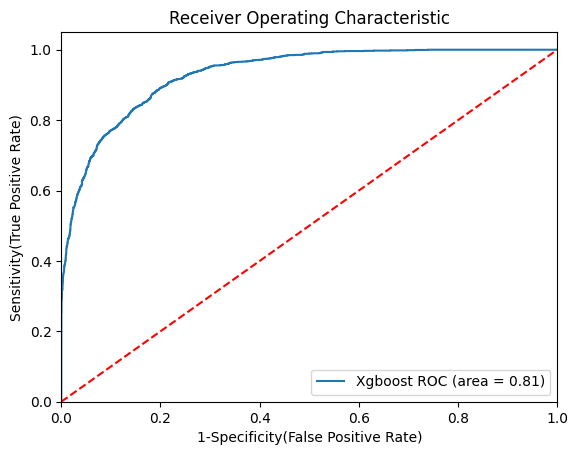

In [36]:
## Plot ROC AUC Curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Xgboost',
    'model':XGBClassifier(n_estimators=300,max_depth=5,learning_rate=0.1,
                           colsample_bytree=0.3),
    'auc':  0.8109
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()